## Scientific Computation Lab 3

In the first two tasks of this lab, we will continue using timing tests to build our understanding of the cost of different operations in Python. Keep in mind that timing results can be unreliable for operations that are very fast. In such cases, it can be helpful to repeat the operation several times and to then compute the average time taken per repetition. It can also be helpful to experiment with different timers, particularly if you are using Windows (e.g. see the documentation here: https://docs.python.org/3/library/time.html)

We typically aim to compare timing results with estimates of the time complexity. The following reference contains useful information about the expected cost of various operations with a few Python containers: https://wiki.python.org/moin/TimeComplexity




### Task 1: Analyzing the cost of the Python hash function

1) We have stated that the cost of lookup in a Python dictionary is independent of the size of the dictionary, but what about the length of the key? Analyze the time required to compute the hash of strings with a range of lengths using the Python built-in hash function. The range of lengths should span several orders of magnitude and initially, you can try a maximum length of $10^5$. Depending on your computer, you may be able to consider longer lengths. You should make a log-log plot of the wall time vs. string length.

**Notes:**
1. np.logspace can be used to generate the string lengths if dtype=int is used 
2. A simple way to construct a string with length N is: 'a' * N
3. Python stores the hash of a string once it is computed, so timeit will give misleading results as the hash will only be computed during the first iteration of the loop used by timeit.

In [49]:
#Add code here
import time
import numpy as np
times = np.array([])
for N in np.logspace(1, 5, num = 200):
    str = 'a' * int(N)
    t1 = time.time()
    x = hash(str)
    t2 = time.time()
    times = np.append(times, t2 - t1)

In [81]:
lengths = np.logspace(1, 5, num = 200)
import matplotlib.pyplot as plt

2) Assume that for sufficiently large string lengths that $t \sim N^a$ where $t$ is the wall time and $N$ is the string length. Estimate $a$ by computing a linear least-squares fir to, $log(t) = a log(N) + b$. The coefficients $a$ and $b$ can be computed with *np.polyfit* or something similar.


In [85]:
#Add code here
parameters = np.polyfit(np.log(lengths[len(lengths)//2:]), np.log(times[len(times)//2:]), 1)
parameters[0]

0.8736402036150119

An important general point to keep in mind is that strings are containers (like lists and dictionaries), and when carrying out tasks with containers, it is important to carefully consider if/how the cost of the task depends on the size of the container.

### Task 2: String matching efficiency

Our simple pattern-search algorithm utilizes a character-by-character comparison of the pattern with sub-strings in the larger genetic sequence:

In [86]:
infile = open('test_sequence.txt','r') #file should be in same folder as this notebook
S = infile.read() #(long) gene sequence
infile.close()
P = 'TCGATCGGAAGT' #example pattern

imatch=[] #list of match locations
n,m=len(S),len(P)

#Iterate through data
for ind in range(0,n-m+1):
    if ind%1000000==0: print("ind=",ind)
    match=True
    for j in range(m): #character-by-character comparison
        if P[j] != S[ind+j]:
            match=False
            break
    if match:
        print("match found!, ind=",ind)
        imatch.append(ind)
            

ind= 0
ind= 1000000
ind= 2000000
ind= 3000000
match found!, ind= 3268774
ind= 4000000


In Python, it is possible to directly compare strings. For example, given two strings, S1 and S2, we can simply check if S1==S2. We don't know (without doing a little research) the algorithm Python uses for this comparison or if it will be better than the approach used in our pattern search code.

1) How does the use of direct string comparison affect the speed of the pattern search code? Create a new function which replaces the character-by-character comparison with a direct comparison. Compare the time required by each function.

In [90]:
from time import time

def psearch1(S,P):
    imatch=[] #list of match locations
    n,m=len(S),len(P)

    #Iterate through data
    for ind in range(0,n-m+1):
        match=True
        for j in range(m): #character-by-character comparison
            if P[j] != S[ind+j]:
                match=False
                break
        if match:
            #print("match found!, ind=",ind)
            imatch.append(ind)
    return imatch

def psearch2(S,P):
     #Add code here
    imatch = []
    n, m = len(S), len(P)

    for ind in range(0, n - m + 1):
        if S[ind:ind + m] == P:
            imatch.append(ind)
    return imatch
        
#Add more code here

t1 = time()
x1 = psearch1(S, P)
t2 = time()
x2 = psearch2(S, P)
t3 = time()
print(t2 - t1, t3 - t2)

1.6383538246154785 0.6931400299072266


2) Use numerical tests to construct an estimate of the asymptotic time complexity of direct string comparison. How does it compare to character-by-character comparison? What happens if the two strings match or "nearly" match?

In [96]:
#add code here
x = np.linspace(0, 10, 100)
n = 100000
times1 = []
times2 = []
for i in range(0, len(S), n):
    t_1 = time()
    x_1 = psearch1(S[0:i*len(S)//n], P)
    t_2 = time()
    x_2 = psearch2(S[0:i*len(S)//n], P)
    t_3 = time()
    times1.append(t2 - t1)
    times2.append(t3 - t2)
plt.plot(x, times1)
plt.plot(x, times2)

KeyboardInterrupt: 

### Task 3: Building a simple graph in NetworkX

1. Create an edge list for the graph shown below and then use the edge list to create and display a NetworkX graph. Number the nodes from $1$ to $8$ with node $1$ corresponding to the central high-degree node.
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/4/49/Star_network_7.svg/180px-Star_network_7.svg.png">

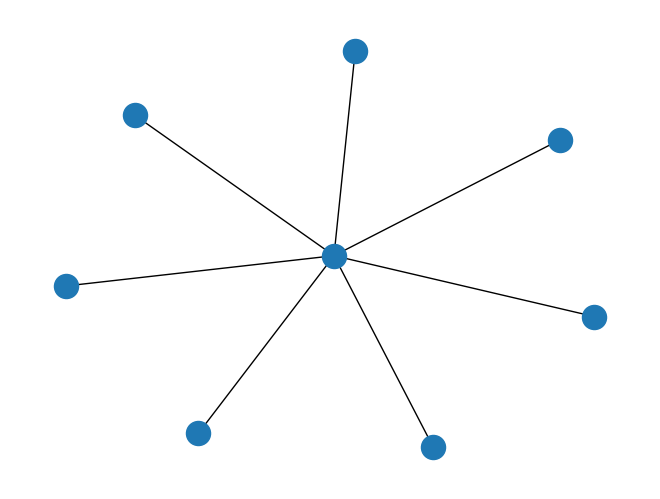

In [103]:
import networkx as nx
#Add code here
G = nx.Graph()
G.add_nodes_from([1, 2, 3, 4, 5, 6, 7, 8])
G.add_edges_from([(1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8)])
nx.draw(G)

2) Create a list of the degrees in the graph using the *degree* method

In [104]:
#Add code here
nx.degree(G)

DegreeView({1: 7, 2: 1, 3: 1, 4: 1, 5: 1, 6: 1, 7: 1, 8: 1})